In [ ]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
#Load the dataset into pandas dataframe
thyroid_df = pd.read_csv('/content/drive/MyDrive/Datasets/hypothyroid.csv')

In [ ]:
thyroid_df.head(1000)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,34,F,f,f,t,f,t,f,f,f,...,t,205,t,1.84,t,111,f,?,STMW,P
996,72,F,f,f,f,f,f,f,f,f,...,t,141,t,1.09,t,129,f,?,other,P
997,34,F,f,f,f,f,f,f,f,f,...,t,139,t,1.06,t,131,f,?,other,P
998,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P


In [ ]:
thyroid_df = thyroid_df.drop(columns=['referral source', 'TBG'], axis=1)

In [ ]:
thyroid_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125,t,1.14,t,109,f,P
1,23,F,f,f,f,f,f,f,f,f,...,t,2,t,102,f,?,f,?,f,P
2,46,M,f,f,f,f,f,f,f,f,...,f,?,t,109,t,0.91,t,120,f,P
3,70,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175,f,?,f,?,f,P
4,70,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61,t,0.87,t,70,f,P


In [ ]:
thyroid_df.shape

(3772, 28)

In [ ]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

#Label encoding

leaving numerical columns for label encoding and then after we concatenate them

In [ ]:
numerical_col = thyroid_df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
thyroid_df = thyroid_df.drop(columns=['age', 'TSH', 'T3', 'TT4 measured', 'TT4', 'T4U', 'FTI'])

In [ ]:
numerical_col.head()

,age,TSH,T3,TT4,T4U,FTI
0,41,1.3,2.5,125,1.14,109
1,23,4.1,2,102,?,?
2,46,0.98,?,109,0.91,120
3,70,0.16,1.9,175,?,?
4,70,0.72,1.2,61,0.87,70


In [ ]:
thyroid_df.head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,goitre,tumor,hypopituitary,psych,TSH measured,T3 measured,T4U measured,FTI measured,TBG measured,binaryClass
0,F,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,t,t,f,P
1,F,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,f,f,f,P
2,M,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,f,t,t,f,P
3,F,t,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,f,f,f,P
4,F,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,t,t,f,P


In [ ]:
#label encoding
label_encoder = LabelEncoder()
for column in thyroid_df.columns:
    thyroid_df[column]=label_encoder.fit_transform(thyroid_df[column])

In [ ]:
thyroid_df.head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,goitre,tumor,hypopituitary,psych,TSH measured,T3 measured,T4U measured,FTI measured,TBG measured,binaryClass
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,1


#handling ? values of numerical_columns

<Axes: xlabel='TSH', ylabel='Count'>

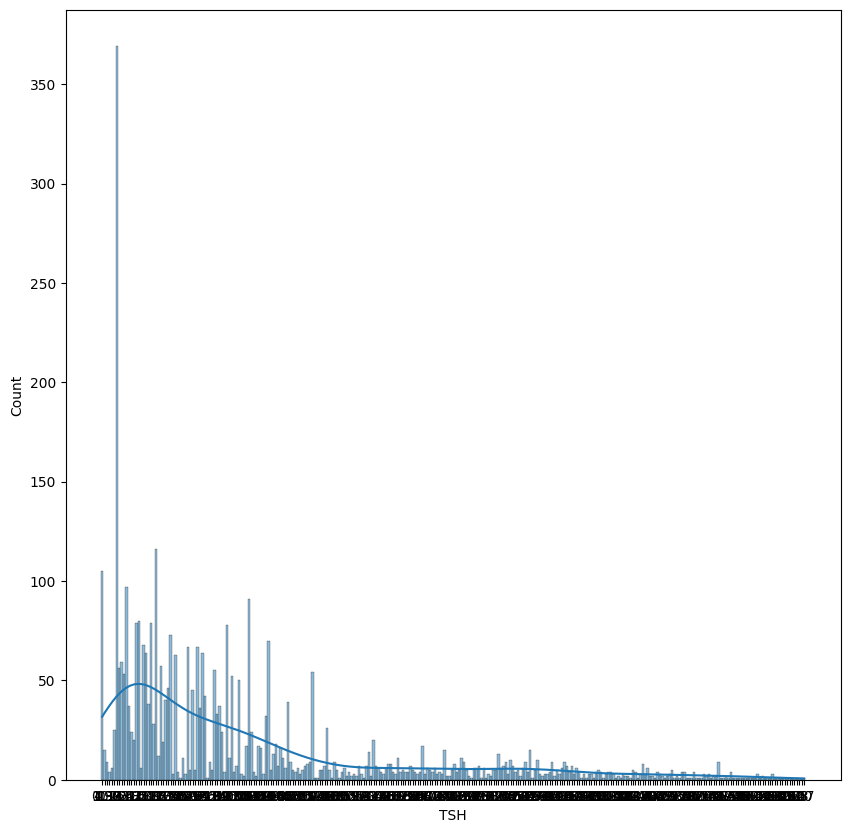

In [ ]:
# for TSH column
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(numerical_col['TSH'], kde=True, ax=ax)

In [ ]:
# Replace '?' with NaN
numerical_col['TSH'].replace('?', np.nan, inplace=True)

# Convert non-numeric values to NaN
numerical_col['TSH'] = pd.to_numeric(numerical_col['TSH'], errors='coerce')

# Fill missing values in 'TSH' with the mean of the column
median_value = numerical_col['TSH'].median()
numerical_col['TSH'] = numerical_col['TSH'].fillna(median_value)

<Axes: xlabel='TSH', ylabel='Count'>

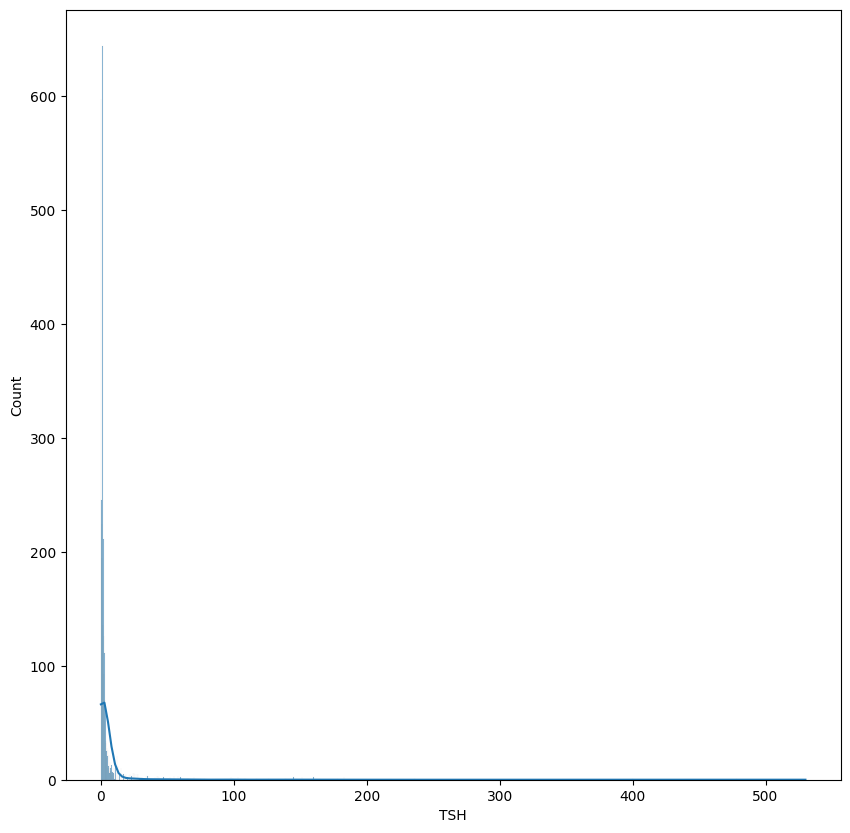

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(numerical_col['TSH'], kde=True, ax=ax)

<Axes: xlabel='T3', ylabel='Count'>

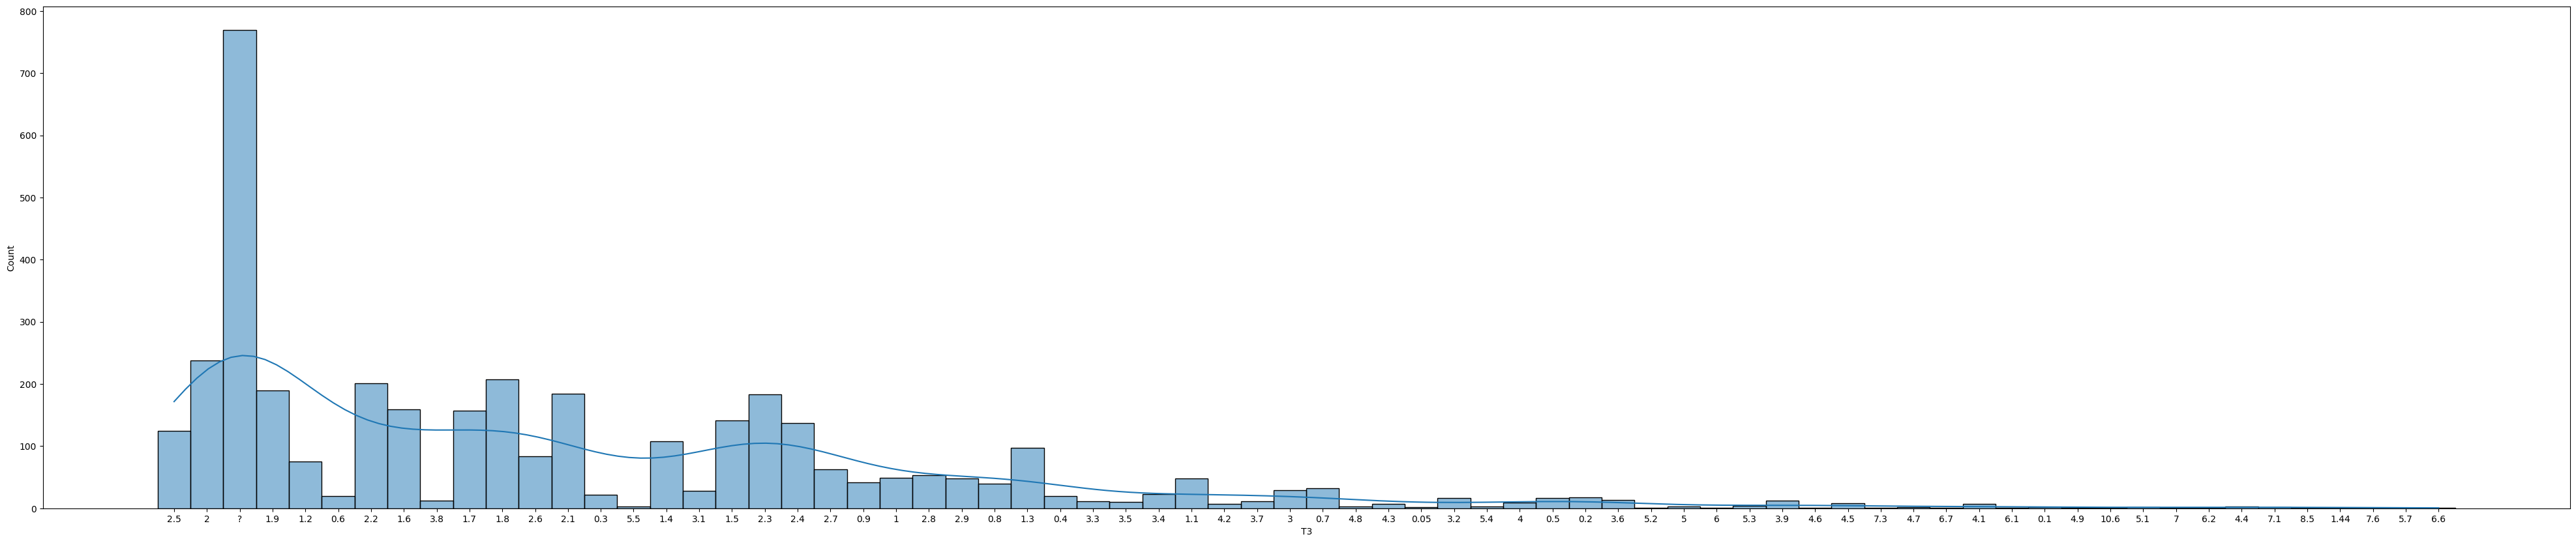

In [ ]:
# for T3 column
fig, ax = plt.subplots(figsize=(50,10))
sns.histplot(numerical_col['T3'], kde=True, ax=ax)

In [ ]:
# Replace '?' with NaN
numerical_col['T3'].replace('?', np.nan, inplace=True)

# Convert non-numeric values to NaN
numerical_col['T3'] = pd.to_numeric(numerical_col['T3'], errors='coerce')

# Fill missing values in 'T3' with the mean of the column
median_value = numerical_col['T3'].median()
numerical_col['T3'] = numerical_col['T3'].fillna(median_value)

<Axes: xlabel='T3', ylabel='Count'>

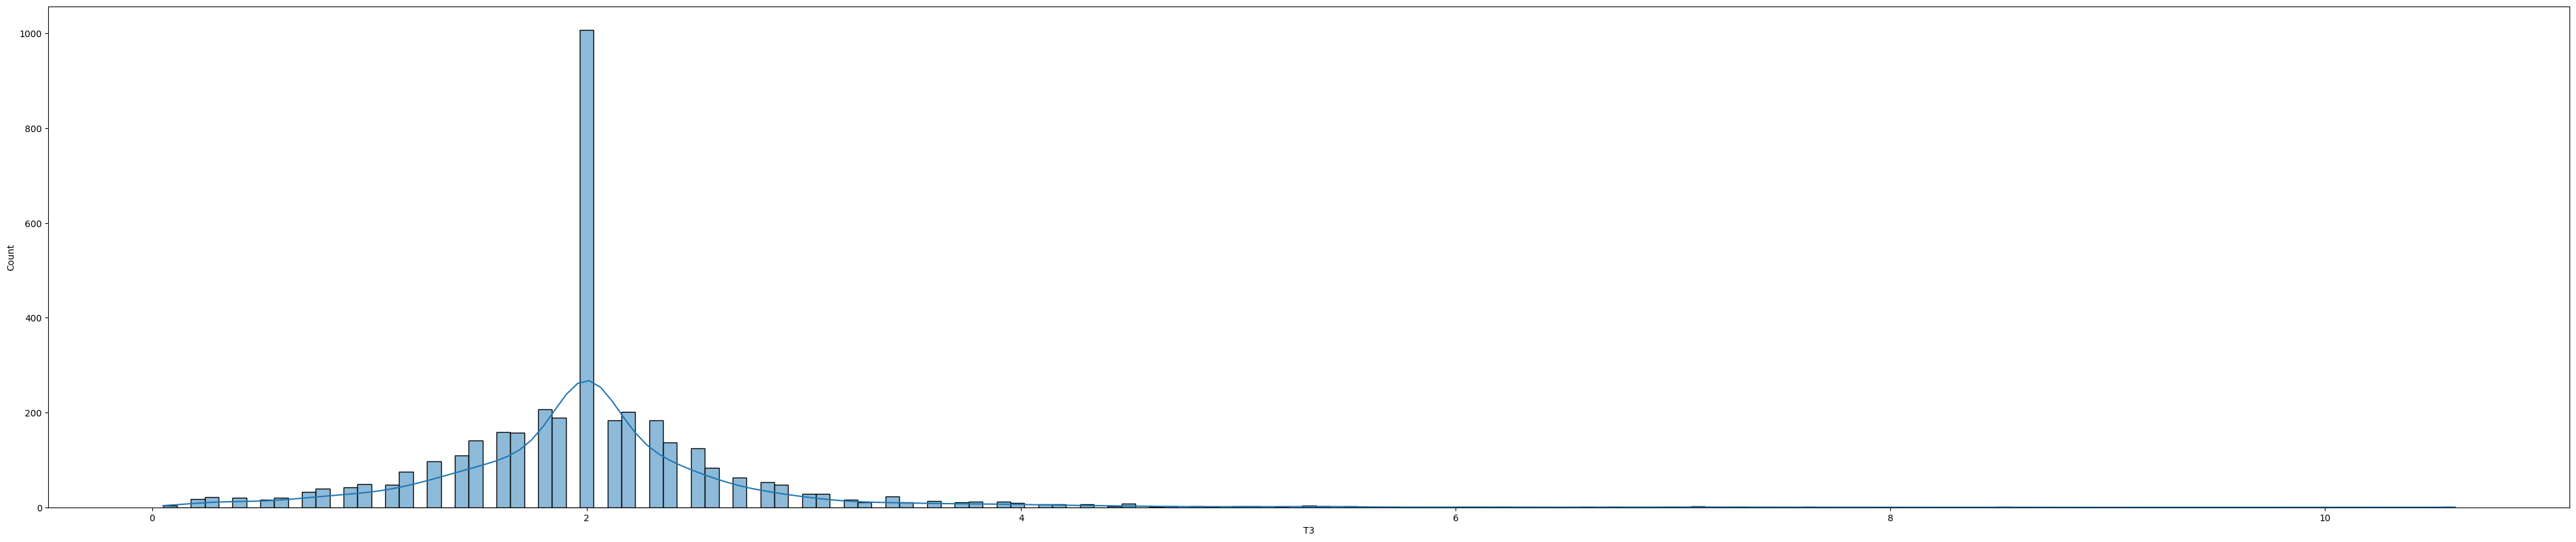

In [ ]:
fig, ax = plt.subplots(figsize=(50,10))
sns.histplot(numerical_col['T3'], kde=True, ax=ax)

<Axes: xlabel='TT4', ylabel='Count'>

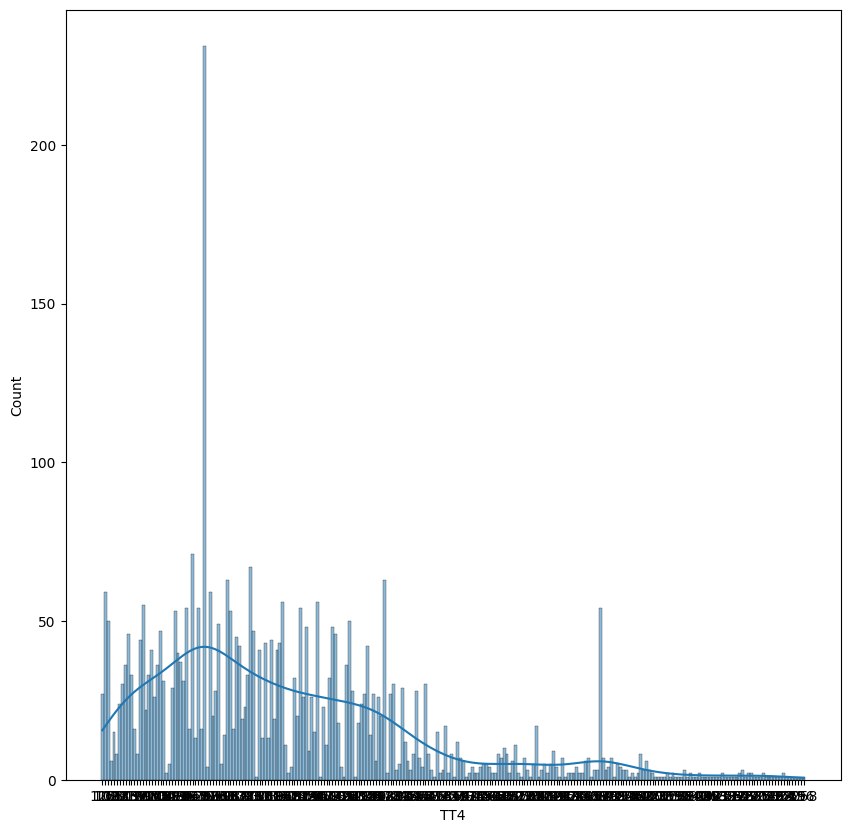

In [ ]:
# for TT4 column
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(numerical_col['TT4'], kde=True, ax=ax)

In [ ]:
# Replace '?' with NaN
numerical_col['TT4'].replace('?', np.nan, inplace=True)

# Convert non-numeric values to NaN
numerical_col['TT4'] = pd.to_numeric(numerical_col['TT4'], errors='coerce')

# Fill missing values in 'TT4' with the mean of the column
median_value = numerical_col['TT4'].median()
numerical_col['TT4'] = numerical_col['TT4'].fillna(median_value)

<Axes: xlabel='TT4', ylabel='Count'>

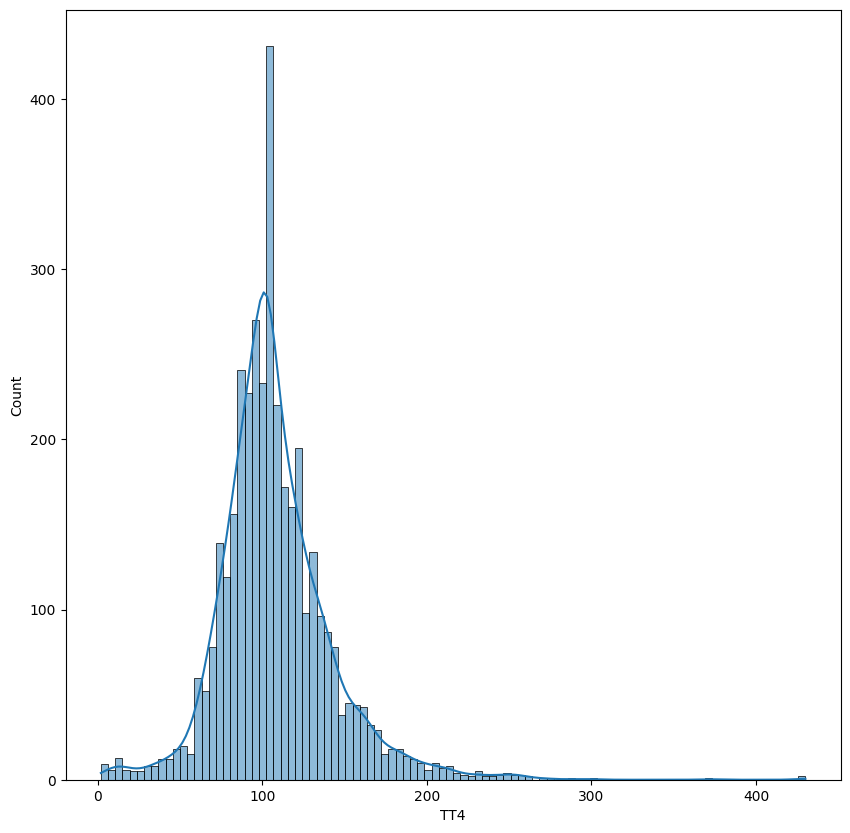

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(numerical_col['TT4'], kde=True, ax=ax)

<Axes: xlabel='T4U', ylabel='Count'>

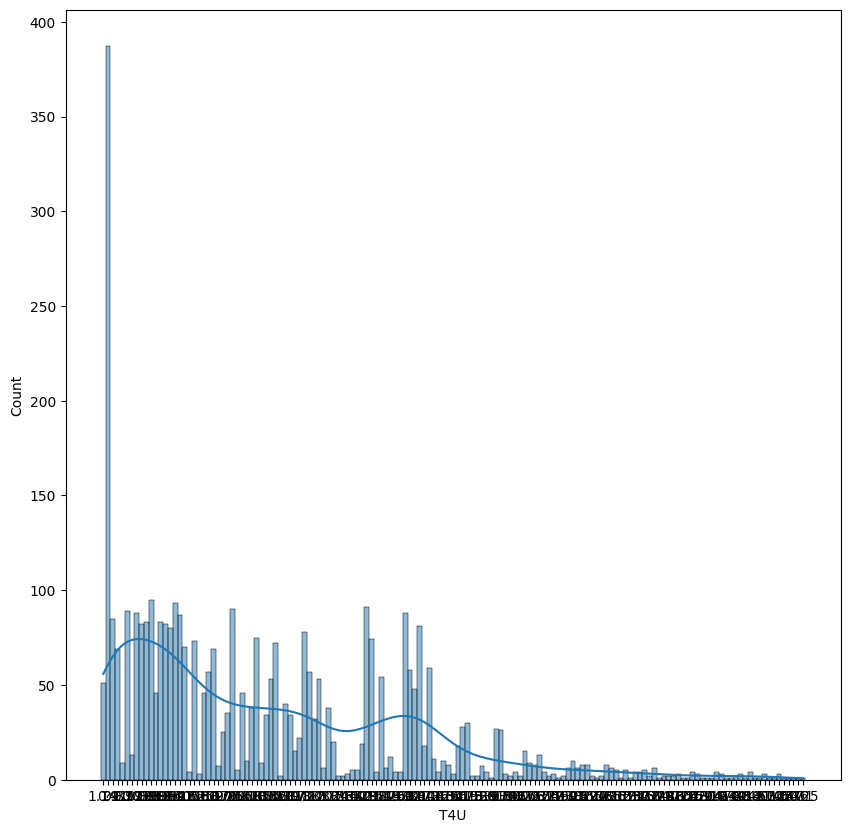

In [ ]:
# for T4U column
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(numerical_col['T4U'], kde=True, ax=ax)

In [ ]:
# Replace '?' with NaN
numerical_col['T4U'].replace('?', np.nan, inplace=True)

# Convert non-numeric values to NaN
numerical_col['T4U'] = pd.to_numeric(numerical_col['T4U'], errors='coerce')

# Fill missing values in 'T4U' with the mean of the column
median_value = numerical_col['T4U'].median()
numerical_col['T4U'] = numerical_col['T4U'].fillna(median_value)

<Axes: xlabel='T4U', ylabel='Count'>

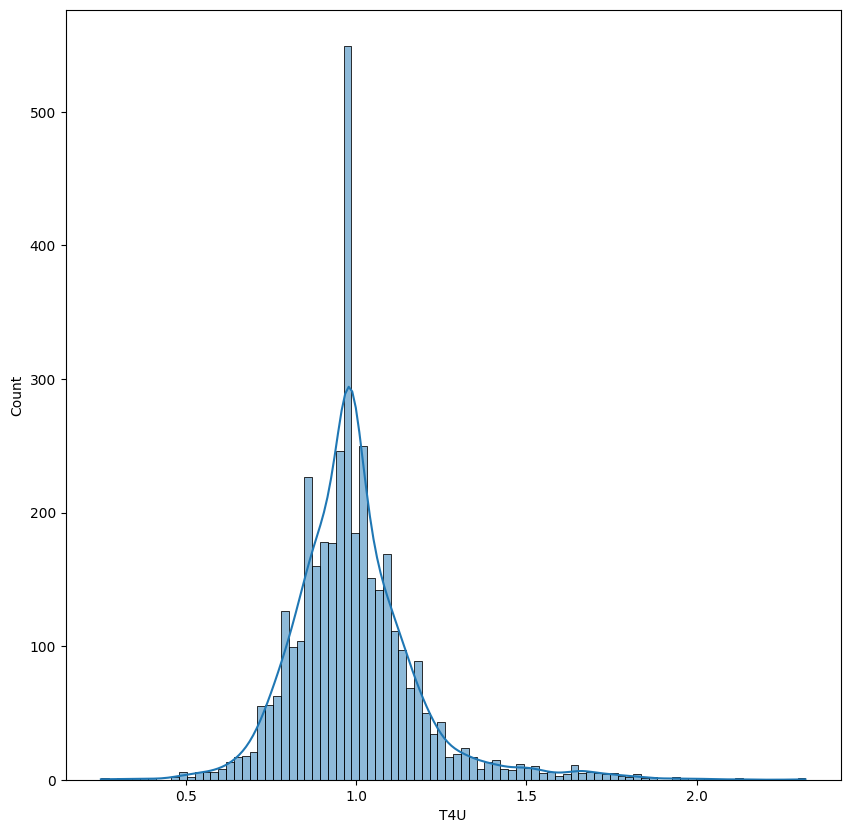

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(numerical_col['T4U'], kde=True, ax=ax)

<Axes: xlabel='T4U', ylabel='Count'>

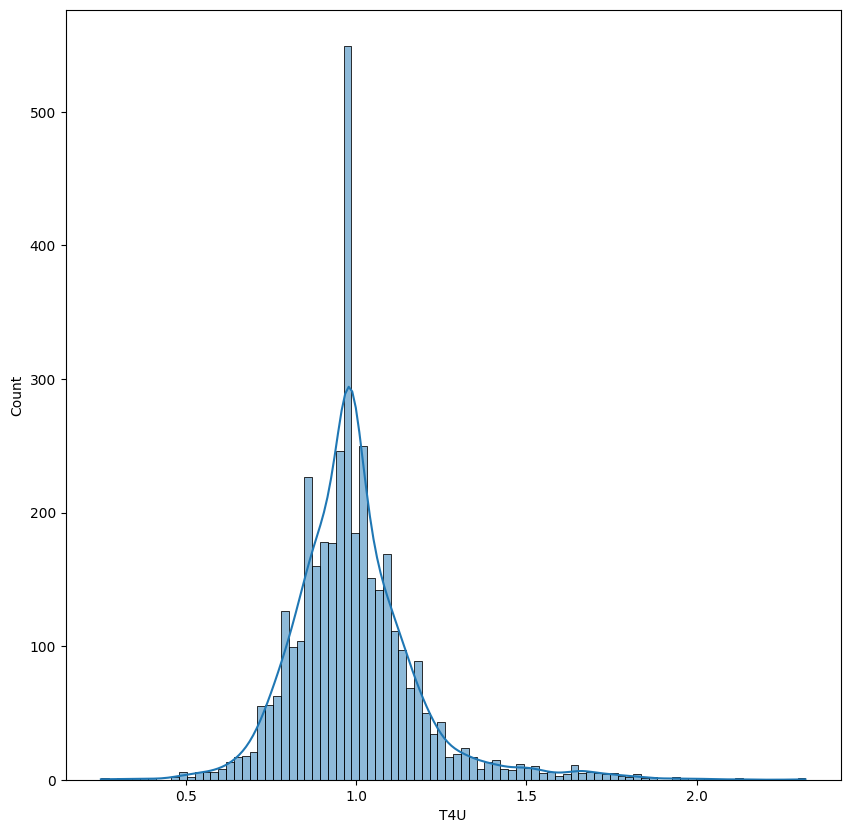

In [ ]:
# for FTI column
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(numerical_col['T4U'], kde=True, ax=ax)

In [ ]:
# Replace '?' with NaN
numerical_col['FTI'].replace('?', np.nan, inplace=True)

# Convert non-numeric values to NaN
numerical_col['FTI'] = pd.to_numeric(numerical_col['FTI'], errors='coerce')

# Fill missing values in 'FTI' with the mean of the column
median_value = numerical_col['FTI'].median()
numerical_col['FTI'] = numerical_col['FTI'].fillna(median_value)

<Axes: xlabel='T4U', ylabel='Count'>

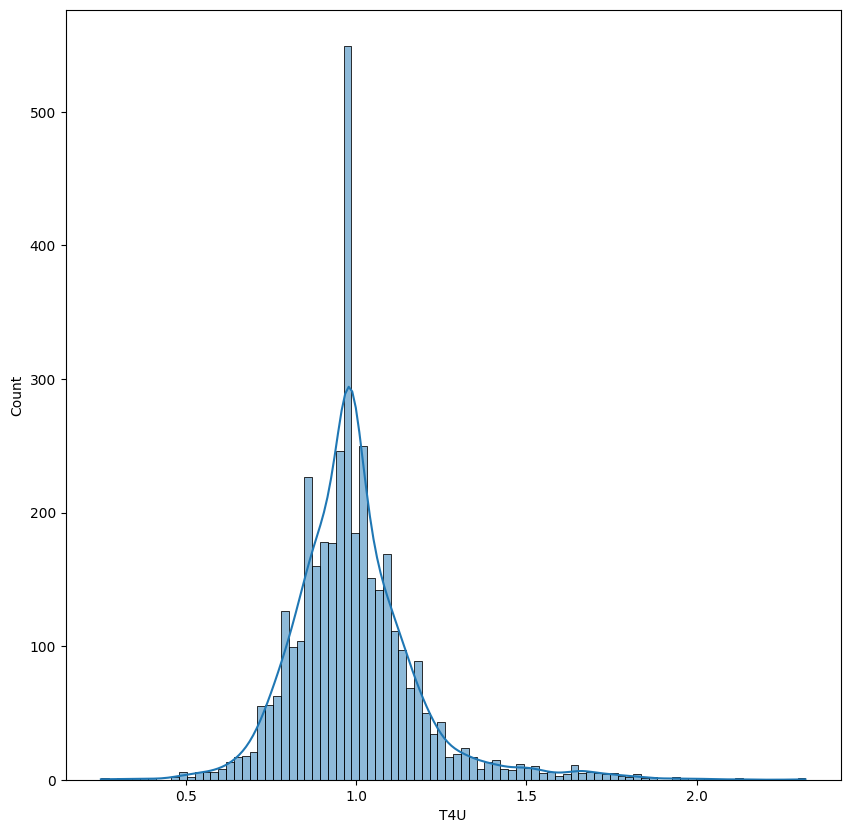

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(numerical_col['T4U'], kde=True, ax=ax)

In [ ]:
numerical_col.head()

,age,TSH,T3,TT4,T4U,FTI
0,41,1.30,2.5,125.0,1.14,109.0
1,23,4.10,2.0,102.0,0.98,107.0
2,46,0.98,2.0,109.0,0.91,120.0
3,70,0.16,1.9,175.0,0.98,107.0
4,70,0.72,1.2,61.0,0.87,70.0


In [ ]:
numerical_col.shape, thyroid_df.shape

((3772, 6), (3772, 21))

now concatenate the string data with numerical data

In [ ]:
thyroid_df = pd.concat([thyroid_df, numerical_col], axis=1)

In [ ]:
thyroid_df.head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,T4U measured,FTI measured,TBG measured,binaryClass,age,TSH,T3,TT4,T4U,FTI
0,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,41,1.30,2.5,125.0,1.14,109.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,23,4.10,2.0,102.0,0.98,107.0
2,2,0,0,0,0,0,0,0,0,0,...,1,1,0,1,46,0.98,2.0,109.0,0.91,120.0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,70,0.16,1.9,175.0,0.98,107.0
4,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,70,0.72,1.2,61.0,0.87,70.0


In [ ]:
# for shifting binaryClass in end column
binaryClass = thyroid_df.binaryClass
thyroid_df = thyroid_df.drop(columns='binaryClass')
thyroid_df = pd.concat([thyroid_df, binaryClass], axis=1)
print(thyroid_df.head())

   sex  on thyroxine  query on thyroxine  on antithyroid medication  sick  \
0    1             0                   0                          0     0   
1    1             0                   0                          0     0   
2    2             0                   0                          0     0   
3    1             1                   0                          0     0   
4    1             0                   0                          0     0   

   pregnant  thyroid surgery  I131 treatment  query hypothyroid  \
0         0                0               0                  0   
1         0                0               0                  0   
2         0                0               0                  0   
3         0                0               0                  0   
4         0                0               0                  0   

   query hyperthyroid  ...  T4U measured  FTI measured  TBG measured  age  \
0                   0  ...             1             1   

In [ ]:
thyroid_df.head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,T4U measured,FTI measured,TBG measured,age,TSH,T3,TT4,T4U,FTI,binaryClass
0,1,0,0,0,0,0,0,0,0,0,...,1,1,0,41,1.30,2.5,125.0,1.14,109.0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,23,4.10,2.0,102.0,0.98,107.0,1
2,2,0,0,0,0,0,0,0,0,0,...,1,1,0,46,0.98,2.0,109.0,0.91,120.0,1
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,70,0.16,1.9,175.0,0.98,107.0,1
4,1,0,0,0,0,0,0,0,0,0,...,1,1,0,70,0.72,1.2,61.0,0.87,70.0,1


In [ ]:
#
#
#
#
#
#
#
#
#

#
#
#
#

here binaryClass is not string so make it string

In [ ]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex                        3772 non-null   int64  
 1   on thyroxine               3772 non-null   int64  
 2   query on thyroxine         3772 non-null   int64  
 3   on antithyroid medication  3772 non-null   int64  
 4   sick                       3772 non-null   int64  
 5   pregnant                   3772 non-null   int64  
 6   thyroid surgery            3772 non-null   int64  
 7   I131 treatment             3772 non-null   int64  
 8   query hypothyroid          3772 non-null   int64  
 9   query hyperthyroid         3772 non-null   int64  
 10  lithium                    3772 non-null   int64  
 11  goitre                     3772 non-null   int64  
 12  tumor                      3772 non-null   int64  
 13  hypopituitary              3772 non-null   int64

In [ ]:
thyroid_df.shape

(3772, 27)

Now

In [ ]:
#for duplicates
thyroid_df = thyroid_df.drop_duplicates()
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3711 entries, 0 to 3771
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex                        3711 non-null   int64  
 1   on thyroxine               3711 non-null   int64  
 2   query on thyroxine         3711 non-null   int64  
 3   on antithyroid medication  3711 non-null   int64  
 4   sick                       3711 non-null   int64  
 5   pregnant                   3711 non-null   int64  
 6   thyroid surgery            3711 non-null   int64  
 7   I131 treatment             3711 non-null   int64  
 8   query hypothyroid          3711 non-null   int64  
 9   query hyperthyroid         3711 non-null   int64  
 10  lithium                    3711 non-null   int64  
 11  goitre                     3711 non-null   int64  
 12  tumor                      3711 non-null   int64  
 13  hypopituitary              3711 non-null   int64  
 1

In [ ]:
thyroid_df['age'] = pd.to_numeric(thyroid_df['age'], errors='coerce')

In [ ]:
thyroid_df.age.dtype

dtype('float64')

In [ ]:
#Handling missing values
thyroid_df.isnull().sum()

,0
sex,0
on thyroxine,0
query on thyroxine,0
on antithyroid medication,0
sick,0
pregnant,0
thyroid surgery,0
I131 treatment,0
query hypothyroid,0
query hyperthyroid,0


In [ ]:
# Fill missing values in 'age' with the median of the age
median_value = thyroid_df['age'].median()
thyroid_df['age'] = thyroid_df['age'].fillna(median_value)

In [ ]:
thyroid_df.isnull().sum()

,0
sex,0
on thyroxine,0
query on thyroxine,0
on antithyroid medication,0
sick,0
pregnant,0
thyroid surgery,0
I131 treatment,0
query hypothyroid,0
query hyperthyroid,0


In [ ]:
thyroid_df.describe()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,T4U measured,FTI measured,TBG measured,age,TSH,T3,TT4,T4U,FTI,binaryClass
count,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,...,3711.000000,3711.000000,3711.0,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000
mean,1.266505,0.125034,0.013473,0.011318,0.039612,0.014282,0.014282,0.015899,0.063056,0.063056,...,0.911884,0.912423,0.0,51.860954,4.780750,2.010924,108.082943,0.993669,110.175883,0.921584
std,0.525220,0.330802,0.115306,0.105795,0.195072,0.118666,0.118666,0.125100,0.243096,0.243096,...,0.283502,0.282718,0.0,20.120903,23.503574,0.744325,34.792847,0.186720,31.621135,0.268861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.0,36.000000,0.585000,1.700000,89.000000,0.890000,94.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.0,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,1.000000
75%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.0,67.000000,2.500000,2.300000,123.000000,1.070000,122.000000,1.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,1.000000


#Data standardization

In [ ]:
X = thyroid_df.drop(columns='binaryClass')
Y = thyroid_df.binaryClass
print(X)
print(Y)

      sex  on thyroxine  query on thyroxine  on antithyroid medication  sick  \
0       1             0                   0                          0     0   
1       1             0                   0                          0     0   
2       2             0                   0                          0     0   
3       1             1                   0                          0     0   
4       1             0                   0                          0     0   
...   ...           ...                 ...                        ...   ...   
3767    1             0                   0                          0     0   
3768    1             0                   0                          0     0   
3769    1             0                   0                          0     0   
3770    2             0                   0                          0     0   
3771    1             0                   0                          0     0   

      pregnant  thyroid surgery  I131 t

In [ ]:
print(X.std())

sex                           0.525220
on thyroxine                  0.330802
query on thyroxine            0.115306
on antithyroid medication     0.105795
sick                          0.195072
pregnant                      0.118666
thyroid surgery               0.118666
I131 treatment                0.125100
query hypothyroid             0.243096
query hyperthyroid            0.243096
lithium                       0.069485
goitre                        0.095291
tumor                         0.158766
hypopituitary                 0.016416
psych                         0.217110
TSH measured                  0.276321
T3 measured                   0.393184
T4U measured                  0.283502
FTI measured                  0.282718
TBG measured                  0.000000
age                          20.120903
TSH                          23.503574
T3                            0.744325
TT4                          34.792847
T4U                           0.186720
FTI                      

In [ ]:
scaler = StandardScaler()
x_standardizer = scaler.fit_transform(X)
X = x_standardizer

In [ ]:
X.std()

0.9805806756909201

In [ ]:
print(X)

[[-0.50748414 -0.37802267 -0.11686518 ...  0.4862878   0.78380076
  -0.03719161]
 [-0.50748414 -0.37802267 -0.11686518 ... -0.1748567  -0.0732134
  -0.10044897]
 [ 1.39673591 -0.37802267 -0.11686518 ...  0.02636119 -0.44815709
   0.31072387]
 ...
 [-0.50748414 -0.37802267 -0.11686518 ...  0.11259743  0.40885707
  -0.16370633]
 [ 1.39673591 -0.37802267 -0.11686518 ... -0.74976495 -0.28746694
  -0.73302258]
 [-0.50748414 -0.37802267 -0.11686518 ... -0.26109294  0.40885707
  -0.57487918]]


#**Handling Imbalance Dataset**

In [ ]:
print(thyroid_df.shape)

(3711, 27)


In [ ]:
print(thyroid_df.binaryClass.value_counts())

binaryClass
1    3420
0     291
Name: count, dtype: int64


In [ ]:
# no of 0 and 1 are unequal so make them equal   so we have to make 1 sample of 291 random values
zero = thyroid_df[thyroid_df.binaryClass==0]
one = thyroid_df[thyroid_df.binaryClass==1]

In [ ]:
print(zero.shape, one.shape)

(291, 27) (3420, 27)


Undersampling

In [ ]:
one_sample = one.sample(n=291)

In [ ]:
print(zero.shape, one_sample.shape)

(291, 27) (291, 27)


concatenate the two

In [ ]:
new_dataset = pd.concat([zero, one_sample], axis=0)

In [ ]:
new_dataset.shape

(582, 27)

In [ ]:
new_dataset.head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,T4U measured,FTI measured,TBG measured,age,TSH,T3,TT4,T4U,FTI,binaryClass
15,1,0,0,0,0,0,0,0,1,0,...,1,1,0,65.0,12.0,2.0,99.0,1.14,87.0,0
40,2,0,0,0,0,0,0,0,0,0,...,1,1,0,44.0,45.0,1.4,39.0,1.16,33.0,0
57,2,0,0,0,0,0,0,0,0,0,...,1,1,0,65.0,14.8,1.5,61.0,0.85,72.0,0
58,1,0,0,0,0,0,0,0,0,0,...,1,1,0,27.0,15.0,1.6,82.0,0.82,100.0,0
59,1,0,0,0,0,0,0,0,0,0,...,1,1,0,54.0,19.0,2.2,83.0,1.03,81.0,0


In [ ]:
#seperate feature and target
X = new_dataset.drop(columns=['binaryClass'], axis=1)
Y = new_dataset.binaryClass

#**Model Selection**

cross validation

In [ ]:
X = np.asarray(X)
Y = np.asarray(Y)

comparing the models with default hyperparameter values using cross validation

**stratified k-fold cross validation**

In [ ]:
#list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(random_state=1), XGBClassifier()]

In [ ]:
def compare_models_cross_validation():
  for model in models:
    print(f'\nfor {model}--\n')
    cv_score = cross_val_score(model, X, Y, cv=5)
    print(cv_score)
    mean_accuracy = sum(cv_score)/len(cv_score)
    print('mean accuracy ', round(mean_accuracy * 100, 2))

In [ ]:
compare_models_cross_validation()


for LogisticRegression(max_iter=1000)--

[0.96581197 0.93162393 0.93965517 0.95689655 0.97413793]
mean accuracy  95.36

for SVC(kernel='linear')--

[0.96581197 0.94871795 0.96551724 0.97413793 0.97413793]
mean accuracy  96.57

for KNeighborsClassifier()--

[0.84615385 0.79487179 0.81896552 0.86206897 0.90517241]
mean accuracy  84.54

for RandomForestClassifier(random_state=1)--

[0.97435897 0.97435897 0.98275862 0.98275862 0.98275862]
mean accuracy  97.94

for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None,

Hence, for this dataset , XGBClassifier has the highest accuracy value with default hyperparameter values

In [ ]:
#later on train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
model = RandomForestClassifier()
model.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score on training data: ', training_data_accuracy*100, '%')
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on testing data: ', test_data_accuracy*100, '%')

Accuracy score on training data:  100.0 %
Accuracy score on testing data:  98.28571428571429 %


for increasing accuracy more

#Hyperparameter tuning

comparing the models with different hyperparameter values using grid search cv

In [ ]:
#list of models
models_list = [LogisticRegression(max_iter=10000), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=1), XGBClassifier()]

In [ ]:
# creating a dictionary that contains hyperparameter values for the above mentioned models


model_hyperparameters = {


    'log_reg_hyperparameters': {

        'C' : [1,5,10,20]
    },

    'svc_hyperparameters': {

        'kernel' : ['linear','poly','rbf','sigmoid'],
        'C' : [1,5,10,20]
    },


    'KNN_hyperparameters' : {

        'n_neighbors' : [3,5,7, 9, 11]
    },


    'random_forest_hyperparameters' : {

        'n_estimators' : [10, 20, 50, 100]
    },

    'xgb_hyperparameters' : {
    'n_estimators': [50, 100, 200, 300],           # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2],       # Step size shrinkage used to prevent overfitting
    }
}

In [ ]:
model_keys = list(model_hyperparameters.keys())
model_keys

['log_reg_hyperparameters',
 'svc_hyperparameters',
 'KNN_hyperparameters',
 'random_forest_hyperparameters',
 'xgb_hyperparameters']

In [ ]:
model_hyperparameters[model_keys[0]]

{'C': [1, 5, 10, 20]}

In [ ]:
def grid_selection(list_of_models, model_hyperparameters):
  result=[]
  i = 0
  for model in list_of_models:
    key = model_keys[i]
    params = model_hyperparameters[key]
    i = i + 1
    print(model)
    print(params)
    print('**********************************')
    classifier = GridSearchCV(model, params, cv=5)
    classifier.fit(X, Y)
    result.append({
      'model used' : model,
      'highest score' : classifier.best_score_,
      'best hyperparameters' : classifier.best_params_
    })
    print(pd.DataFrame(classifier.cv_results_))
  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])
  return result_dataframe

In [ ]:
grid_selection(models_list, model_hyperparameters)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
**********************************
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.287198      0.177346         0.002065        0.001516       1   
1       0.725766      0.051908         0.001452        0.000455       5   
2       0.604664      0.235560         0.001477        0.000442      10   
3       0.394622      0.030704         0.001304        0.000109      20   

      params  split0_test_score  split1_test_score  split2_test_score  \
0   {'C': 1}           0.965812           0.931624           0.939655   
1   {'C': 5}           0.965812           0.940171           0.956897   
2  {'C': 10}           0.965812           0.931624           0.965517   
3  {'C': 20}           0.957265           0.923077           0.965517   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.956897           0.974138         0.953625        0.015870   
1           0.

,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=10000),0.957073,{'C': 10}
1,SVC(),0.969083,"{'C': 5, 'kernel': 'linear'}"
2,KNeighborsClassifier(),0.852314,{'n_neighbors': 3}
3,RandomForestClassifier(random_state=1),0.981108,{'n_estimators': 50}
4,"XGBClassifier(base_score=None, booster=None, c...",0.984527,"{'learning_rate': 0.01, 'n_estimators': 300}"


Hence, XGBClassifier has highest accuracy for learning_rate=0.01 and n_estimators=300

#**Now, Train test split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#**Model Training**

In [ ]:
model = XGBClassifier(learning_rate=0.01, n_estimators=300)

In [ ]:
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#**Model Evaluation**

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score on training data: ', training_data_accuracy*100, '%')

Accuracy score on training data:  98.77149877149877 %


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on testing data: ', test_data_accuracy*100, '%')

Accuracy score on testing data:  98.85714285714286 %


In [ ]:
thyroid_df.head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,T4U measured,FTI measured,TBG measured,age,TSH,T3,TT4,T4U,FTI,binaryClass
0,1,0,0,0,0,0,0,0,0,0,...,1,1,0,41.0,1.30,2.5,125.0,1.14,109.0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,23.0,4.10,2.0,102.0,0.98,107.0,1
2,2,0,0,0,0,0,0,0,0,0,...,1,1,0,46.0,0.98,2.0,109.0,0.91,120.0,1
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,70.0,0.16,1.9,175.0,0.98,107.0,1
4,1,0,0,0,0,0,0,0,0,0,...,1,1,0,70.0,0.72,1.2,61.0,0.87,70.0,1


In [ ]:
thyroid_df.shape

(3711, 27)

In [784]:
input_data = (1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,28.0,1.4,2.4,102.0,1.08,95.0)

#changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# we need to reshape the numpy array as we predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)   # -1 represents that automatically decide the no of column  and the no of row is 1
prediction = model.predict(input_data_reshaped)
print(prediction)
if prediction[0]==0:
  print('Negative')
else:
  print('Positive')

[1]
Positive
